In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
bs = 64

In [4]:
import zipfile
with zipfile.ZipFile('test.zip', 'r') as zip_ref:
    zip_ref.extractall('test')
    
with zipfile.ZipFile('train.zip', 'r') as zip_ref:
    zip_ref.extractall('train')

In [5]:
path = os.path.abspath(os.getcwd())
path_img = path+'/train/train'

In [6]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/notebooks/course-v3/nbs/HW/train/train/cat.0.jpg'),
 PosixPath('/notebooks/course-v3/nbs/HW/train/train/cat.1.jpg'),
 PosixPath('/notebooks/course-v3/nbs/HW/train/train/cat.10.jpg'),
 PosixPath('/notebooks/course-v3/nbs/HW/train/train/cat.100.jpg'),
 PosixPath('/notebooks/course-v3/nbs/HW/train/train/cat.1000.jpg')]

In [7]:
np.random.seed(2)
pat = r'/([^/]+)\.\d+.jpg$'

In [8]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

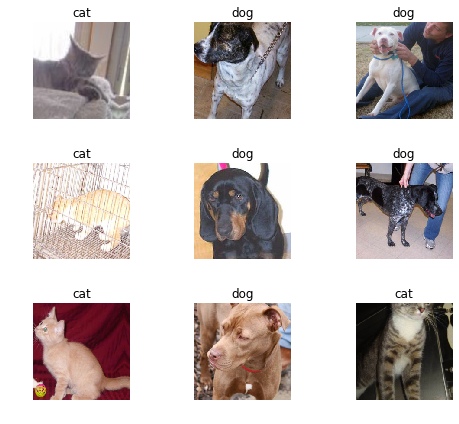

In [9]:
data.show_batch(rows=3, figsize=(7,6))

In [10]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:04<00:00, 19.0MB/s]


In [11]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.084660,0.048894,0.015400,02:21
1,0.060852,0.032236,0.011000,02:19
2,0.041216,0.027592,0.009200,02:19
3,0.030910,0.025625,0.008600,02:19


In [12]:
learn.save('stage-1')

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

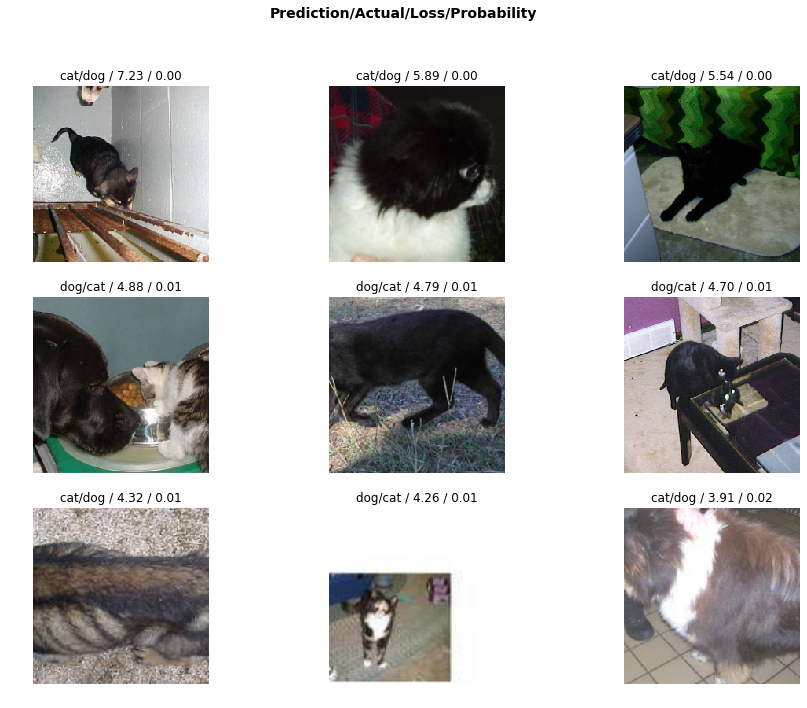

In [14]:
interp.plot_top_losses(9, figsize=(15,11))

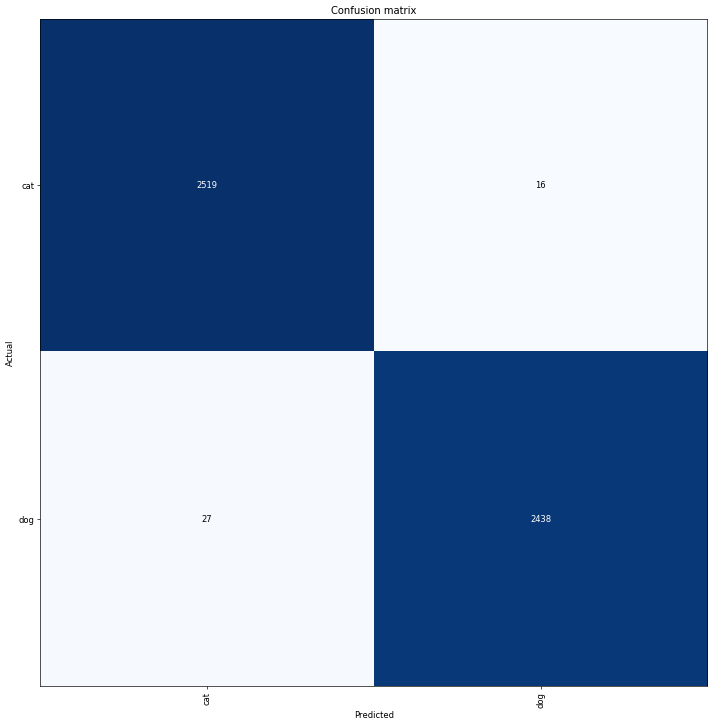

In [15]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)